<a href="https://colab.research.google.com/github/anjot2807/Diabetes_prediction_model/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_recall_fscore_support
from imblearn.combine import SMOTEENN

In [67]:
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")

In [68]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0



the description of variables:

1. gender:
Data Type: Categorical variable (Female/Male)
Description: Patient's gender.

2. age:
Data Type: Numeric variable (float)
Description: Patient's age.

3. hypertension:
Data Type: Binary variable (0/1)
Description: Value of 1 indicates whether the patient has hypertension, and 0 indicates no hypertension.

4. heart_disease:
Data Type: Binary variable (0/1)
Description: Value of 1 indicates whether the patient has heart disease, and 0 indicates no heart disease.

5. smoking_history:
Data Type: Categorical variable (never/current/former/No Info)
Description: Patient's smoking history.

6. bmi:
Data Type: Numeric variable (float)
Description: Body Mass Index (BMI) of the patient.

7. HbA1c_level:
Data Type: Numeric variable (float)
Description: Hemoglobin A1c (HbA1c) level - a measure of diabetes control. Expresses the patient's average blood glucose over the past two to three months.

8. blood_glucose_level:
Data Type: Numeric variable (int)
Description: Patient's blood glucose level.

9. diabetes:
Data Type: Binary variable (0/1)
Description: Value of 1 indicates the presence of diabetes, and 0 indicates its absence.

In [69]:
# checking null values
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [70]:
df.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


In [71]:
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [72]:
df = df.drop_duplicates()

In [73]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [74]:
# loop through each column and count the distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


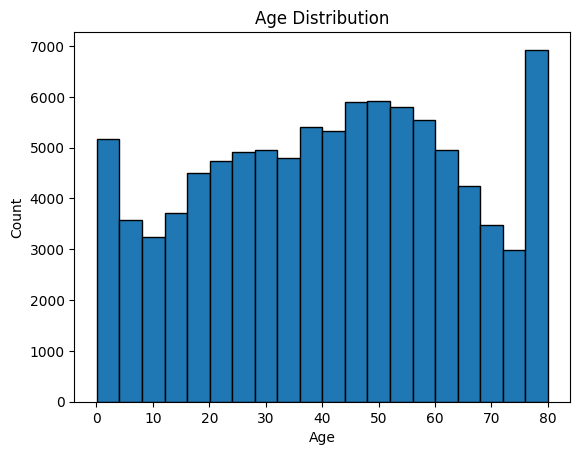

In [75]:
# histogram for age
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

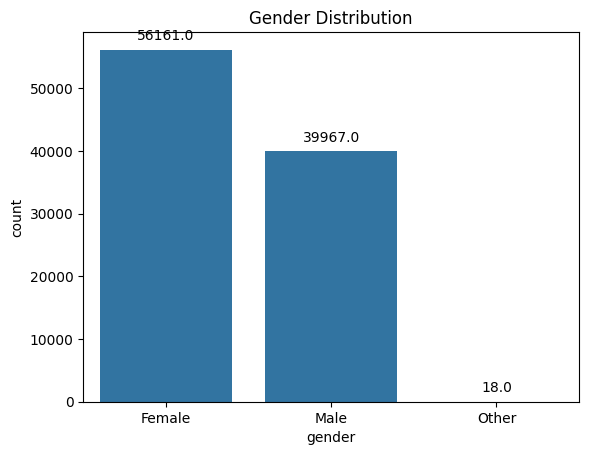

In [ ]:
#bar plot for gender
ax = sns.countplot(x='gender', data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Gender Distribution')
plt.show()

In [ ]:
# mask with deleating of "Other"

df = df[df['gender'] != 'Other']

<ipython-input-15-f615c21664c9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'], bins=30)


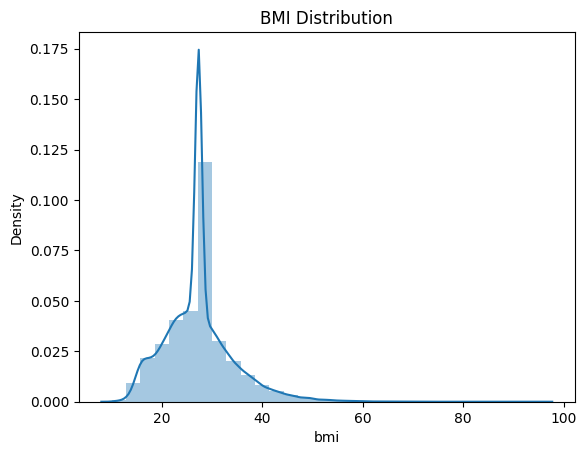

In [ ]:
# distribution plot for BMI
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

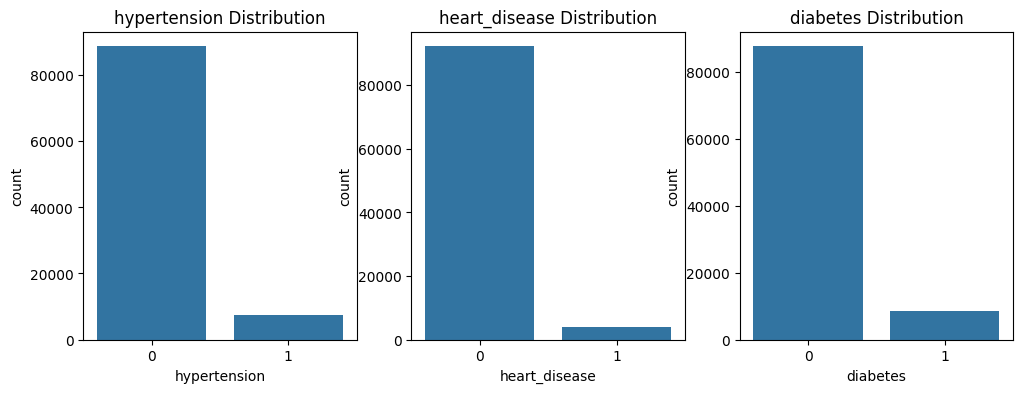

In [ ]:
# counting plots for binary variables

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i, col in enumerate(['hypertension', 'heart_disease', 'diabetes']):
    sns.countplot(x=col, data=df, ax=axs[i])
    axs[i].set_title(f'{col} Distribution')

plt.show()

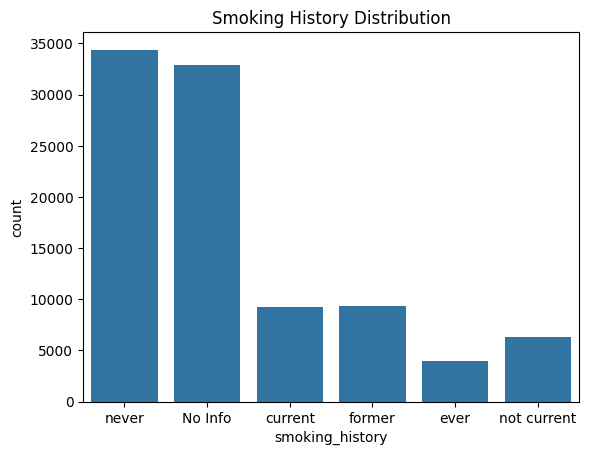

In [ ]:
# counting plot for smoking history
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

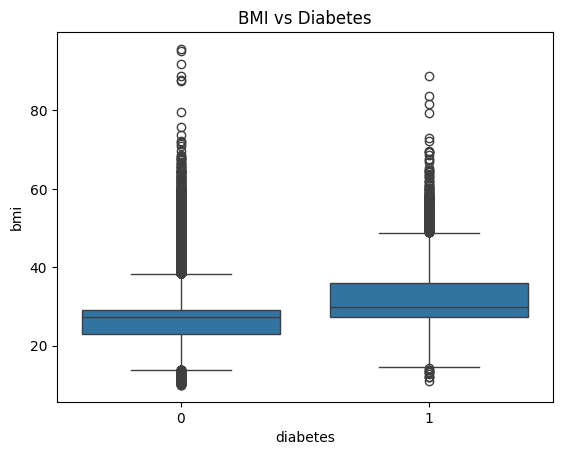

In [ ]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

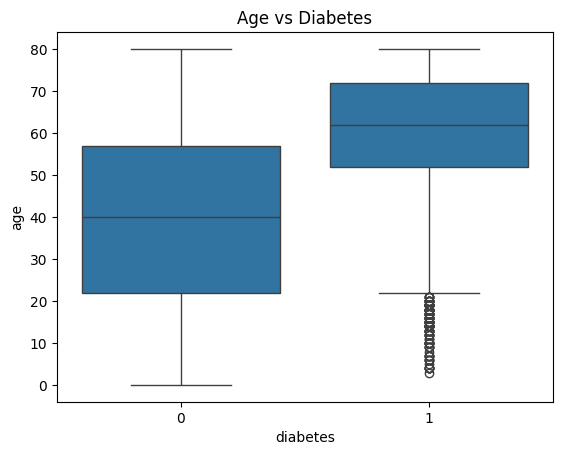

In [ ]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()

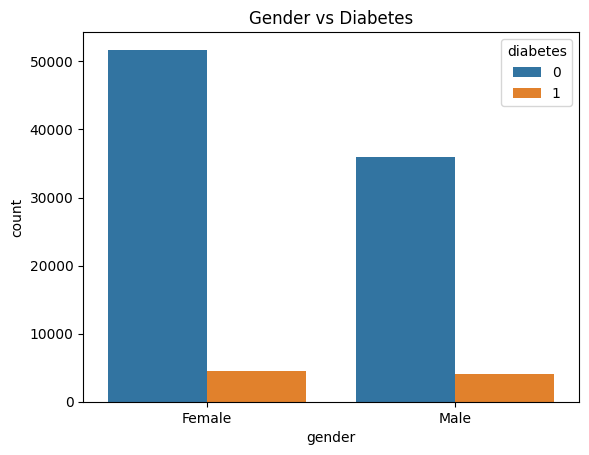

In [ ]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

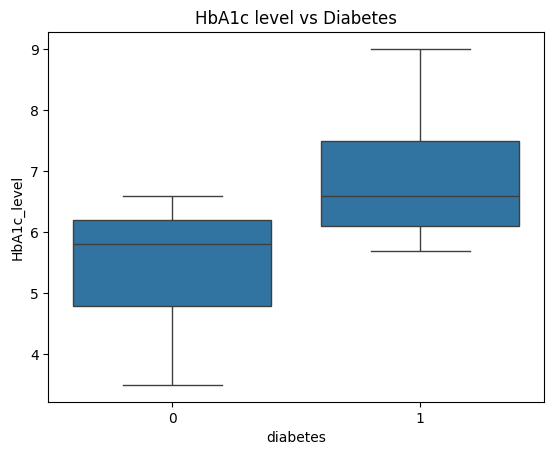

In [ ]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
plt.show()

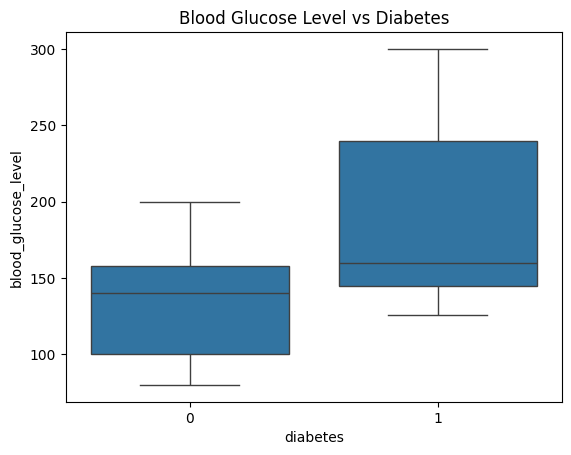

In [ ]:
# Boxplot blood glucose level vs Diabetes classification
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

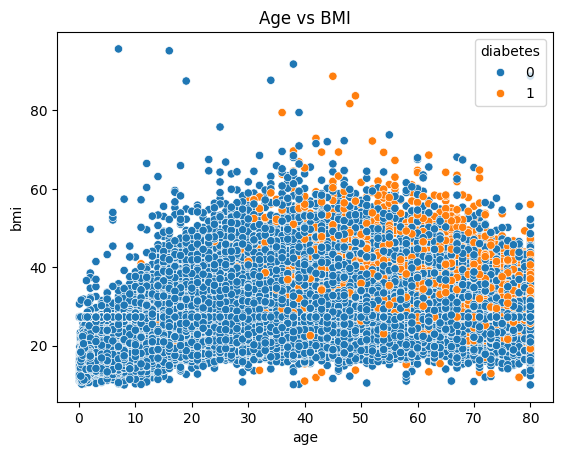

In [ ]:
# scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

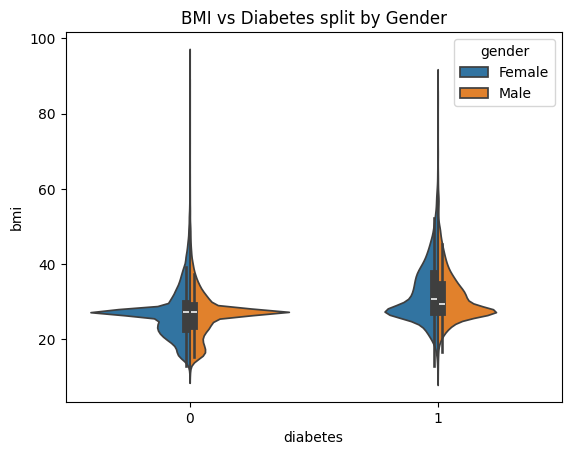

In [ ]:
# violin plot of BMI against diabetes classification split by gender
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=df)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

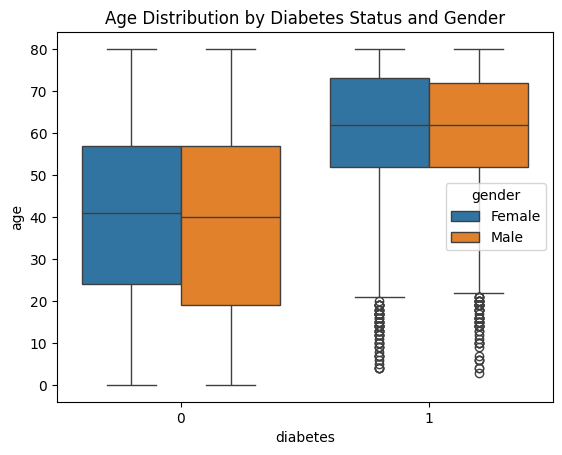

In [ ]:
# interaction between gender, age and diabetes
sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

In [76]:
# defining a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'smoker'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

In [77]:
# appling the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# checking the new value counts
print(df['smoking_history'].value_counts())

non-smoker     67285
past_smoker    19664
smoker          9197
Name: smoking_history, dtype: int64


<ipython-input-77-f7af1c00b867>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)


In [91]:
df_diab = df.copy()

In [92]:
def perform_one_hot_encoding(df, column_name):  #  one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # dropping the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

In [93]:
df_diab = perform_one_hot_encoding(df_diab, 'gender')

In [94]:
df_diab = perform_one_hot_encoding(df_diab, 'smoking_history')

In [95]:
df_diab


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_non-smoker,smoking_history_past_smoker,smoking_history_smoker
0,80.0,0,1,25.19,6.6,140,0,1,0,0,1,0,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,1,0,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,0,1
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,24.60,4.8,145,0,1,0,0,1,0,0
99996,2.0,0,0,17.37,6.5,100,0,1,0,0,1,0,0
99997,66.0,0,0,27.83,5.7,155,0,0,1,0,0,1,0
99998,24.0,0,0,35.42,4.0,100,0,1,0,0,1,0,0


Predictive analysis

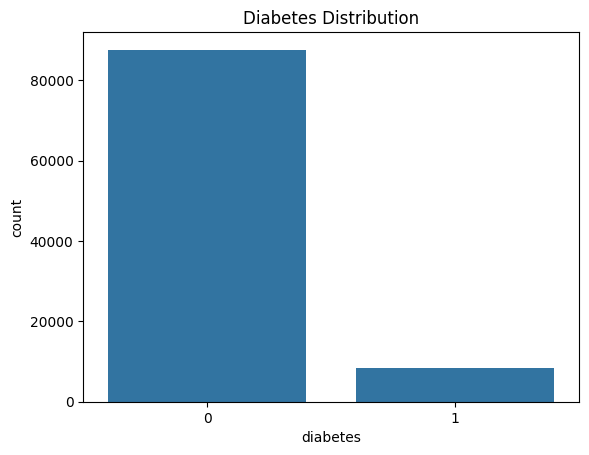

In [ ]:
# Count plot for the 'diabetes' variable
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Distribution')
plt.show()

In [96]:
# splitting data into features and target variable
X = df_diab.drop('diabetes', axis=1)
y = df_diab['diabetes']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
print(X.columns)

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Female', 'gender_Male', 'gender_Other',
       'smoking_history_non-smoker', 'smoking_history_past_smoker',
       'smoking_history_smoker'],
      dtype='object')


In [99]:
# Separation of quantitative and categorical columns
quantitative_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_cols = ['gender_Female', 'gender_Male','smoking_history_non-smoker', 'smoking_history_past_smoker',
       'smoking_history_smoker', 'hypertension', 'heart_disease']

In [100]:
# Apply scaling to quantitative variables on the training set
scaler = StandardScaler()
X_train[quantitative_cols] = scaler.fit_transform(X_train[quantitative_cols])

# Apply the same scaling to the quantitative variables on the test set
X_test[quantitative_cols] = scaler.transform(X_test[quantitative_cols])

In [101]:
# Combine the scaled quantitative and original categorical variables
X_train_scaled = pd.concat([X_train[quantitative_cols], X_train[categorical_cols]], axis=1)
X_test_scaled = pd.concat([X_test[quantitative_cols], X_test[categorical_cols]], axis=1)

In [102]:
X_train_scaled

,age,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,smoking_history_non-smoker,smoking_history_past_smoker,smoking_history_smoker,hypertension,heart_disease
46612,-0.301980,0.624051,0.994649,0.412328,1,0,1,0,0,0,0
31612,-1.842405,-1.789284,-1.428149,-0.198580,1,0,1,0,0,0,0
96143,0.811043,-0.945946,0.901465,-0.931669,1,0,0,1,0,0,0
95691,1.078169,-0.037623,0.435542,-0.198580,0,1,1,0,0,0,0
37658,0.276792,-0.480707,-0.682673,0.167965,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6284,-1.325962,-0.996163,0.435542,0.534510,1,0,1,0,0,0,0
56182,0.900085,0.152904,0.155988,0.534510,0,1,0,1,0,0,0
79353,0.632960,-0.012515,0.528726,1.511963,1,0,1,0,0,1,0
860,-0.212938,-0.346305,0.621911,0.485637,1,0,1,0,0,0,0


In [103]:
X_test_scaled

,age,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,smoking_history_non-smoker,smoking_history_past_smoker,smoking_history_smoker,hypertension,heart_disease
2547,-1.637609,-1.796669,-0.962227,-1.176032,1,0,1,0,0,0,0
34774,-1.014315,-0.674188,0.994649,-1.298214,0,1,1,0,0,0,0
71084,0.454876,-0.448214,1.833310,2.000689,1,0,1,0,0,0,0
50584,0.588439,0.002255,0.155988,-1.298214,0,1,1,0,0,0,0
80788,-0.880753,0.217890,-0.962227,1.511963,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
19314,-1.415004,-0.285750,-1.428149,1.511963,0,1,1,0,0,0,0
17624,-1.192399,-1.098072,0.621911,0.534510,1,0,1,0,0,0,0
8673,-1.849528,0.002255,-0.496304,0.045784,1,0,1,0,0,0,0
37062,0.365834,0.002255,-1.428149,0.167965,1,0,1,0,0,0,0


In [104]:
# logistic regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# prediction for logistic regression
y_pred_logreg = logreg.predict(X_test_scaled)

In [105]:
# calculate precision, recall, fscore, support for each class
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_logreg)

When the dataset is imbalanced, meaning that some classes have significantly more instances than others. In such cases, using a simple accuracy metric might be misleading, as the model could perform well on the majority class but poorly on minority classes.

The "macro" metric helps address this imbalance by considering each class independently and then averaging the performance metrics across all classes. It ensures that the evaluation is not dominated by the majority class and provides a more comprehensive view of the model's ability to generalize across different classes.

In [106]:
# calculate macro average
macro_precision_logreg = sum(precision) / len(precision)
macro_recall_logreg = sum(recall) / len(recall)
macro_fscore_logreg = sum(fscore) / len(fscore)


In [107]:
# results for logistic regression with macro average
print("Results for logistic regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Macro Precision:", macro_precision_logreg)
print("Macro Recall:", macro_recall_logreg)
print("Macro F1 Score:", macro_fscore_logreg)

Results for logistic regression:
Accuracy: 0.9566822672906916
Macro Precision: 0.9074307118713467
Macro Recall: 0.8075022527635742
Macro F1 Score: 0.8488211128404255


Because the amount of diabetics and non-diabetics in the dataset differs significantly, the code below uses a combination of undersampling and oversampling to adjust the balance between classes.

In [108]:
# Appling SMOTEENN only on the training set
smote_enn = SMOTEENN(random_state=42)
X_train_sn, y_train_sn = smote_enn.fit_resample(X_train_scaled , y_train)

# X_test and y_test remain unchanged for evaluation on the original test set

In [109]:
print(X_train_sn.shape, y_train_sn.shape)

(128827, 11) (128827,)


In [110]:
# logistic regression with smoteenn
logreg_sn = LogisticRegression()
logreg_sn.fit(X_train_sn, y_train_sn)

# prediction for logistic regression
y_pred_logreg_sn = logreg_sn.predict(X_test_scaled)

In [111]:
# calculate precision, recall, fscore, support for each class
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_logreg_sn)

In [112]:
# calculate macro average
macro_precision_sn = sum(precision) / len(precision)
macro_recall_sn = sum(recall) / len(recall)
macro_fscore_sn = sum(fscore) / len(fscore)


In [113]:
# results for logistic regression (with smoteenn) with macro average
print("Results for logistic regression (with smoteenn):")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg_sn))
print("Macro Precision:", macro_precision_sn)
print("Macro Recall:", macro_recall_sn)
print("Macro F1 Score:", macro_fscore_sn)

Results for logistic regression (with smoteenn):
Accuracy: 0.871086843473739
Macro Precision: 0.6960621714055317
Macro Recall: 0.8878162567941734
Macro F1 Score: 0.7411317888959016


In [ ]:
# XGBoost


In [114]:
# Calculate the imbalance ratio
imbalance_ratio = (len(y) - sum(y)) / sum(y)
imbalance_ratio

10.335298278707851

imbalance_ratio is used to adjust scale_pos_weight based on class proportions. This approach helps the model better deal with class imbalance and can improve its ability to predict the minority class

In [115]:
# XGBoost with adjusted scale_pos_weight
xgb_classifier = XGBClassifier(scale_pos_weight=imbalance_ratio, random_state=42)
xgb_classifier.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [116]:
y_pred_xgb = xgb_classifier.predict(X_test_scaled)

In [117]:
# calculate precision, recall, fscore, support for each class
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_xgb)

In [119]:
# calculate macro average
macro_precision_xgb = sum(precision) / len(precision)
macro_recall_xgb = sum(recall) / len(recall)
macro_fscore_xgb = sum(fscore) / len(fscore)

In [120]:
# results for XGBoost with macro average
print("Results for XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Macro Precision:", macro_precision_xgb)
print("Macro Recall:", macro_recall_xgb)
print("Macro F1 Score:", macro_fscore_xgb)

Results for XGBoost:
Accuracy: 0.9166926677067083
Macro Precision: 0.753703287317647
Macro Recall: 0.8979281145989202
Macro F1 Score: 0.8027319027121007


In [121]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Prediction for KNN
y_pred_knn = knn_model.predict(X_test_scaled)

In [122]:
# Calculate precision, recall, fscore, support for each class
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_knn)

In [123]:
# Calculate macro average
macro_precision_knn = sum(precision) / len(precision)
macro_recall_knn = sum(recall) / len(recall)
macro_fscore_knn = sum(fscore) / len(fscore)

# Results for KNN with macro average
print("Results for K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Macro Precision:", macro_precision_knn)
print("Macro Recall:", macro_recall_knn)
print("Macro F1 Score:", macro_fscore_knn)

Results for K-Nearest Neighbors:
Accuracy: 0.959074362974519
Macro Precision: 0.9226551703391633
Macro Recall: 0.809601778967231
Macro F1 Score: 0.8553939313132711


In [124]:
# RandomForest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)  #the algorithm itself will adjust the class weights in proportion to their size.
rf_model.fit(X_train_scaled, y_train)

# Prediction for RandomForest
y_pred_rf = rf_model.predict(X_test_scaled)

In [125]:
# Results for RandomForest

# Calculate precision, recall, fscore, support for each class
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_rf)

In [126]:
# Calculate macro average
macro_precision_rf = sum(precision) / len(precision)
macro_recall_rf = sum(recall) / len(recall)
macro_fscore_rf = sum(fscore) / len(fscore)

# Results for RandomForest with macro average
print("Results for RandomForest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Macro Precision:", macro_precision_rf)
print("Macro Recall:", macro_recall_rf)
print("Macro F1 Score:", macro_fscore_rf)


Results for RandomForest:
Accuracy: 0.9672906916276651
Macro Precision: 0.9489949585548298
Macro Recall: 0.8413588343326976
Macro F1 Score: 0.8861933303463913


In [127]:
# funcion for drawning confusion matrix
#def plot_confusion_matrix(model_name, y_true, y_pred):
    #cm = confusion_matrix(y_true, y_pred, normalize='true')
    #plt.figure(figsize=(5, 4))
    #sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    #plt.title(f'Confusion Matrix - {model_name}')
    #plt.xlabel('Predicted')
    #plt.ylabel('True')
    #plt.show()


In [128]:
pip install --upgrade scikit-learn

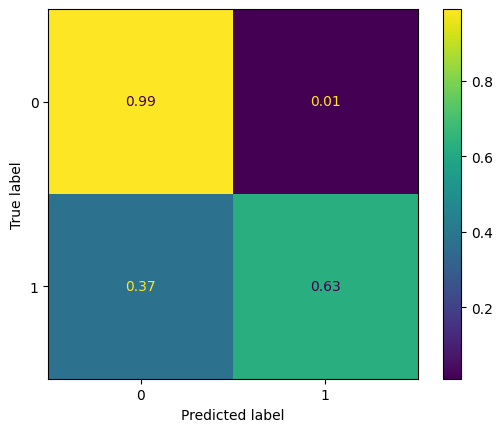

In [134]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Confusion matrix for logistic regression
cm = confusion_matrix(y_test, y_pred_logreg)

# normalization of confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

disp = ConfusionMatrixDisplay(confusion_matrix=normalized_cm, display_labels=None)
disp.plot(cmap='viridis', values_format='.2f')

plt.show()

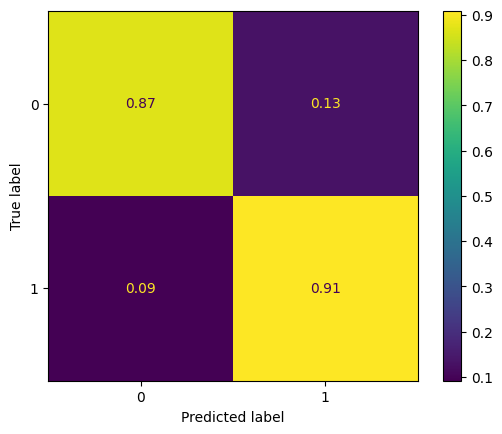

In [135]:
# confusion matrix for logistic regression (with smoteenn)
cm = confusion_matrix(y_test, y_pred_logreg_sn)

# normalization of confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

disp = ConfusionMatrixDisplay(confusion_matrix=normalized_cm, display_labels=None)
disp.plot(cmap='viridis', values_format='.2f')

plt.show()

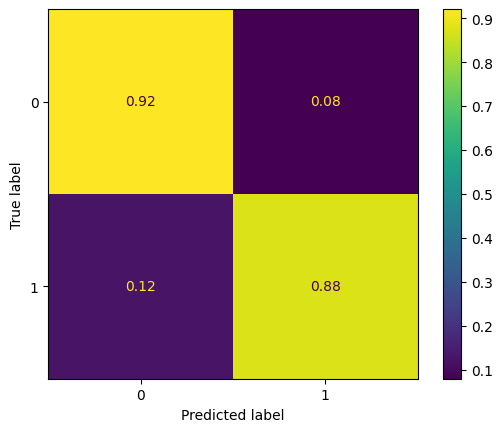

In [136]:
# confusion matrix for XGBoost

cm = confusion_matrix(y_test, y_pred_xgb)

# normalization of confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

disp = ConfusionMatrixDisplay(confusion_matrix=normalized_cm, display_labels=None)
disp.plot(cmap='viridis', values_format='.2f')

plt.show()

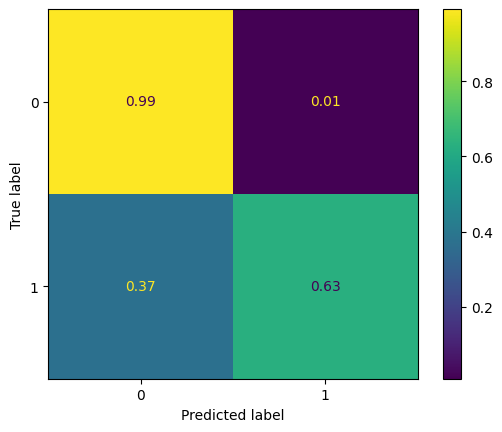

In [137]:
# confusion matrix for K-Nearest Neighbors (KNN)

cm = confusion_matrix(y_test, y_pred_knn)

# normalization of confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

disp = ConfusionMatrixDisplay(confusion_matrix=normalized_cm, display_labels=None)
disp.plot(cmap='viridis', values_format='.2f')

plt.show()


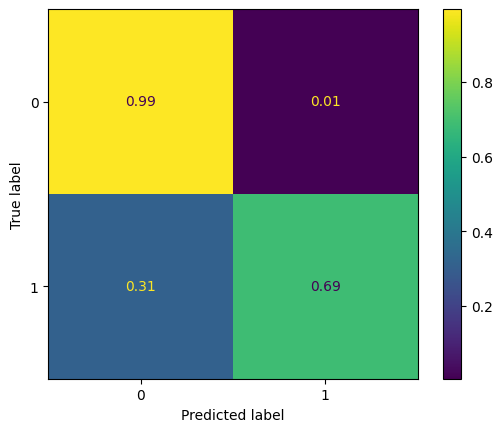

In [138]:
# confusion matrix for RandomForest
cm = confusion_matrix(y_test, y_pred_rf)

# normalization of confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

disp = ConfusionMatrixDisplay(confusion_matrix=normalized_cm, display_labels=None)
disp.plot(cmap='viridis', values_format='.2f')

plt.show()

In [141]:
# Table summarizing the results for different models


results_data = {
    'Model': ['Logistic regression', 'Logistic regression with smoteenn', 'XGBoost', 'KNN', 'RandomForest'],
    'Accuracy': [accuracy_score(y_test, y_pred_logreg),
                 accuracy_score(y_test, y_pred_logreg_sn),
                 accuracy_score(y_test, y_pred_xgb),
                 accuracy_score(y_test, y_pred_knn),
                 accuracy_score(y_test, y_pred_rf)],
    'Macro Precision': [macro_precision_logreg,
                        macro_precision_sn,
                        macro_precision_xgb,
                        macro_precision_knn,
                        macro_precision_rf],
    'Macro Recall': [macro_recall_logreg,
                     macro_recall_sn,
                     macro_recall_xgb,
                     macro_recall_knn,
                     macro_recall_rf],
    'Macro F1 Score': [macro_fscore_logreg,
                       macro_fscore_sn,
                       macro_fscore_xgb,
                       macro_fscore_knn,
                       macro_fscore_rf]
}

results_df = pd.DataFrame(results_data)
print(results_df)



                               Model  Accuracy  Macro Precision  Macro Recall  \
0                Logistic regression  0.956682         0.907431      0.807502   
1  Logistic regression with smoteenn  0.871087         0.696062      0.887816   
2                            XGBoost  0.916693         0.753703      0.897928   
3                                KNN  0.959074         0.922655      0.809602   
4                       RandomForest  0.967291         0.948995      0.841359   

   Macro F1 Score  
0        0.848821  
1        0.741132  
2        0.802732  
3        0.855394  
4        0.886193  


Based on the provided metrics, Random Forest appears to be the most effective model for predicting the diabetes dataset, as it achieves the highest accuracy and a balanced trade-off between precision and recall.